## DS3 Self Driving Car Code

Imported Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import cv2
import os
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader


In [2]:
# Get your directory 
current_dir = os.getcwd()
print(current_dir)

/home/k1mittal


### These are functions which displays files and gets the file names. 

In [3]:
def display_files(number_displayed, data):
    RGB_dataA_files = sorted(os.listdir(current_dir + "/archive-2/"+data+"/"+data+"/CameraRGB"))[:number_displayed]
    Seg_dataA_files = sorted(os.listdir(current_dir + "/archive-2/"+data+"/"+data+"/CameraSeg"))[:number_displayed]
    
    for i in range(len(RGB_dataA_files)):
        RGB_dataA_files[i] = cv2.imread(current_dir + "/archive-2/"+data+"/"+data+"/CameraRGB/" + RGB_dataA_files[i])
        Seg_dataA_files[i] = cv2.imread(current_dir + "/archive-2/"+data+"/"+data+"/CameraSeg/" + Seg_dataA_files[i], cv2.IMREAD_GRAYSCALE)

    fig, axes = plt.subplots(len(RGB_dataA_files), 2, figsize=(20, 30))

    for i in range(len(RGB_dataA_files)):
        axes[i][0].imshow(RGB_dataA_files[i])
        axes[i][1].imshow(Seg_dataA_files[i])

    plt.show()

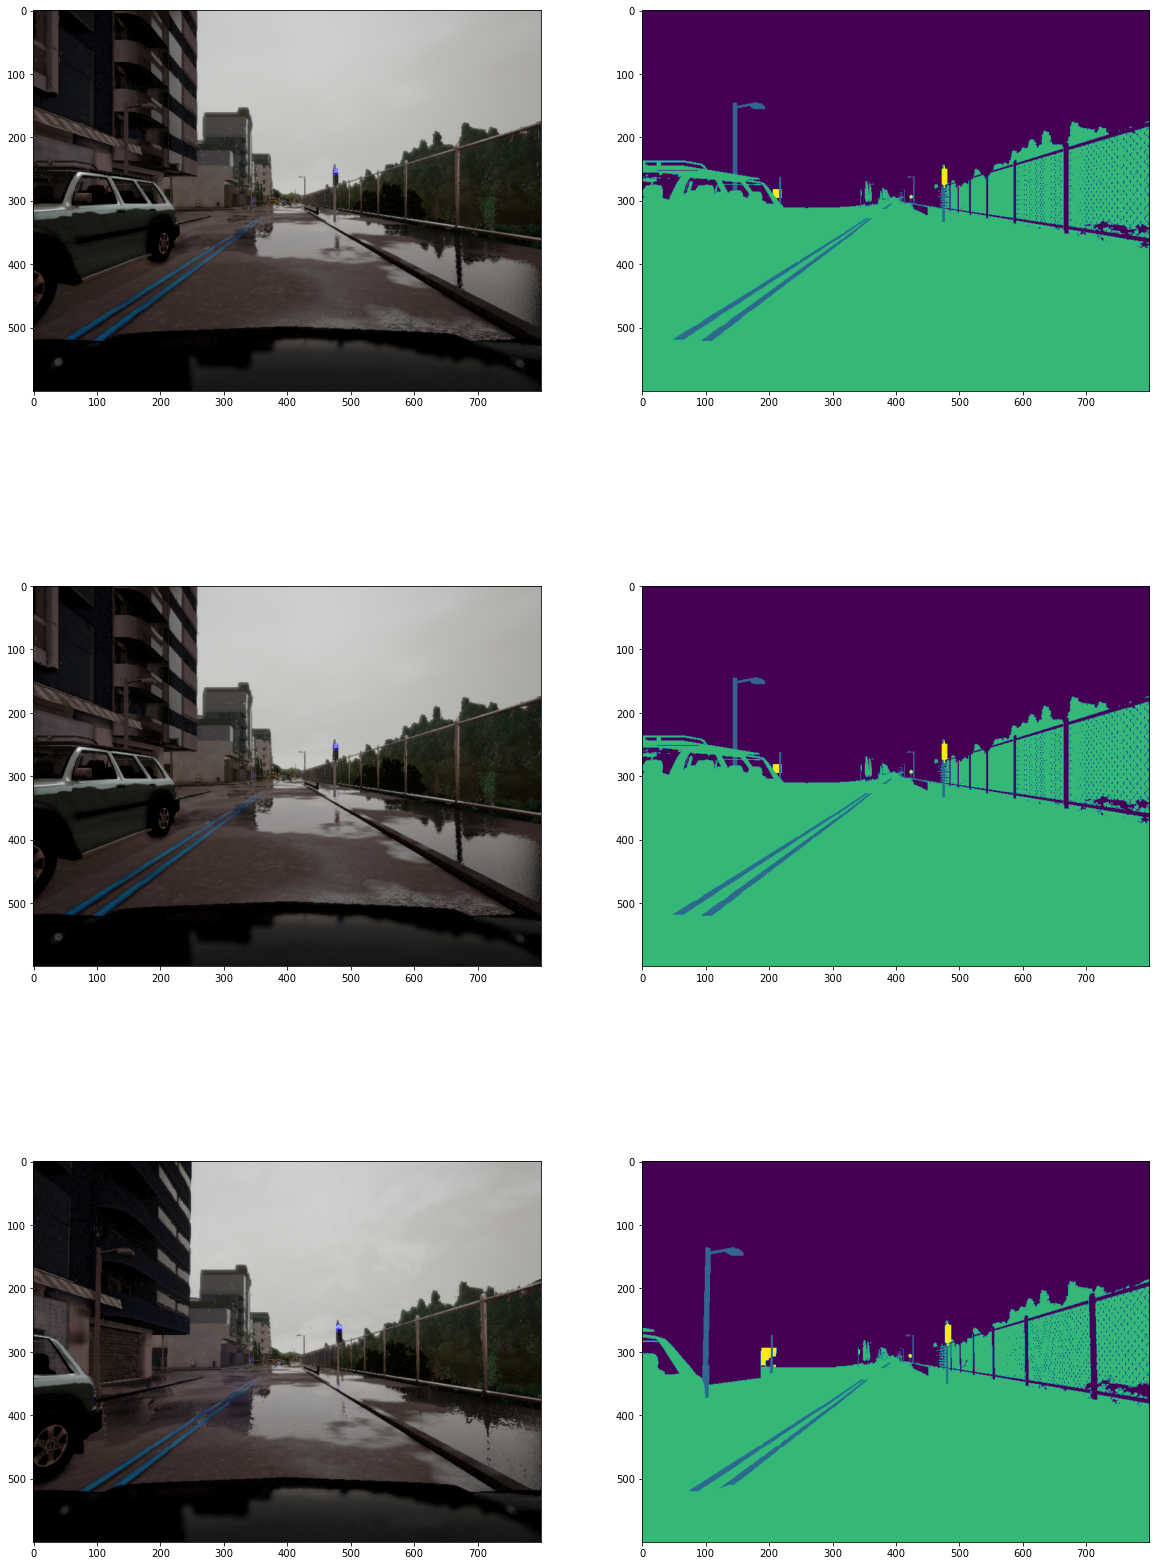

In [4]:
display_files(3, "dataA")

In [5]:
def store_data(data):
    RGB_dataA_files = sorted(os.listdir(current_dir + "/archive-2/"+data+"/"+data+"/CameraRGB"))
    Seg_dataA_files = sorted(os.listdir(current_dir + "/archive-2/"+data+"/"+data+"/CameraSeg"))

    return (RGB_dataA_files, Seg_dataA_files)

In [6]:
image_files = []
mask_files = []
image_files += store_data("dataA")[0]
image_files += store_data("dataB")[0]
image_files += store_data("dataC")[0]
image_files += store_data("dataD")[0]
image_files += store_data("dataE")[0]

mask_files += store_data("dataA")[1]
mask_files += store_data("dataB")[1]
mask_files += store_data("dataC")[1]
mask_files += store_data("dataD")[1]
mask_files += store_data("dataE")[1]

print(image_files[100] + "\n" + mask_files[100])

02_02_000.png
02_02_000.png


### Creating a custom Dataset and Creating a Dataloader

In [7]:
class CustomData(Dataset) : 
    def __init__(self, img_path , mask_path) : 
        self.img_path = img_path 
        self.mask_path = mask_path
        self.transform = transforms.Compose([
            transforms.Resize(size = (IMG_SIZE , IMG_SIZE)) , 
            ToTensor()
        ])
            
    
    def __len__(self) : 
        return len(self.img_path)
    
    
    def __getitem__(self , idx) : 
        image = Image.open(self.img_path[idx])
        tensor_image = self.transform(image)
        
        mask = Image.open(self.mask_path[idx])
        tensor_mask = self.transform(mask)
        
        
        return tensor_image , tensor_mask